In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__


'v0.2.0+423.g22e0c0e.dirty'

In [4]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [6]:
sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [7]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss_t2.csv')
sim1.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [8]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  IRENA
IRENA glass : Data trimmed for Energy, years now encompass  2000  to  2100
IRENA silicon : Data trimmed for Energy, years now encompass  2000  to  2100
IRENA silver : Data trimmed for Energy, years now encompass  2000  to  2100
IRENA aluminium_frames : Data trimmed for Energy, years now encompass  2000 

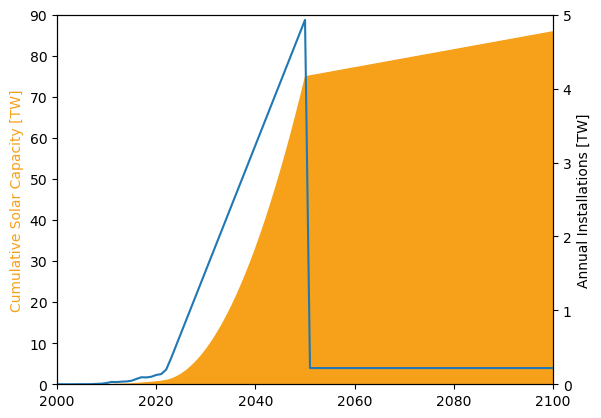

In [9]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [10]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [11]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [12]:
sim1.calculateMassFlow() #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  IRENA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  IRENA  =  13958.58495102539  tonnes.
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  IRENA  =  3870686315.668623  tonnes.
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


In [13]:
sim1.saveSimulation(customname='_debugirena')

:) Saved Input and Output Dataframes


In [14]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots

(0.0, 90.26425956655)

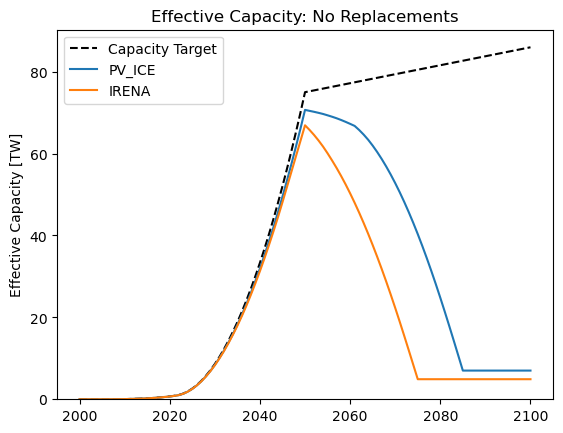

In [15]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

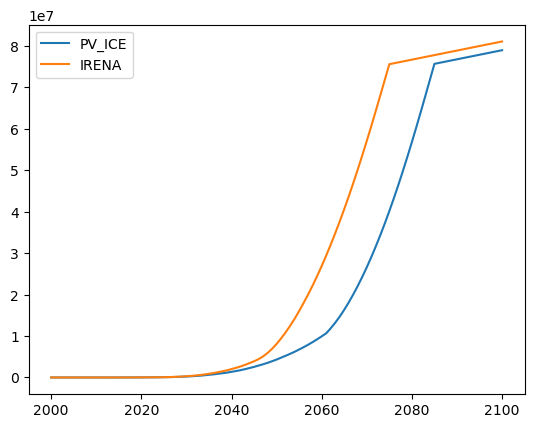

In [16]:
plt.plot(ii_yearly.filter(like='Decommisioned'))
plt.legend(sim1.scenario.keys())

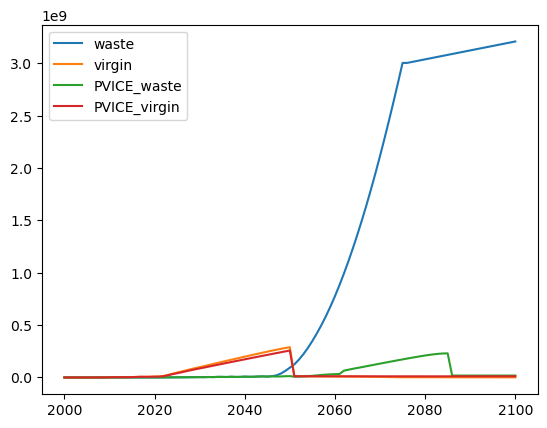

In [17]:
plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='waste')
plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='virgin')

#plt.plot(ii_yearly['WasteAll_Module_sim1_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly['VirginStock_Module_sim1_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')

plt.legend()

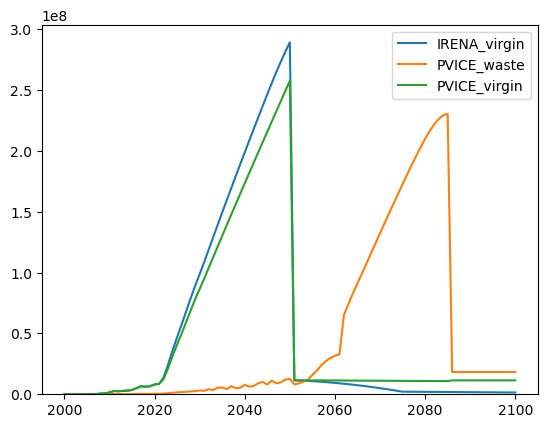

In [19]:
plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

(0.0, 21003692590.23291)

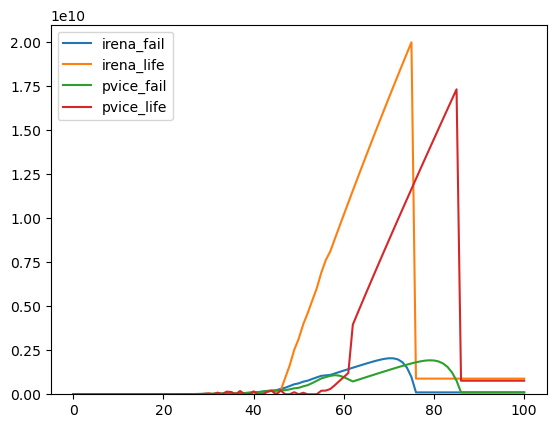

In [20]:
plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='irena_fail')
plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='irena_life')

#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='pvice_fail')
plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='pvice_life')
plt.legend()
plt.ylim(0,)

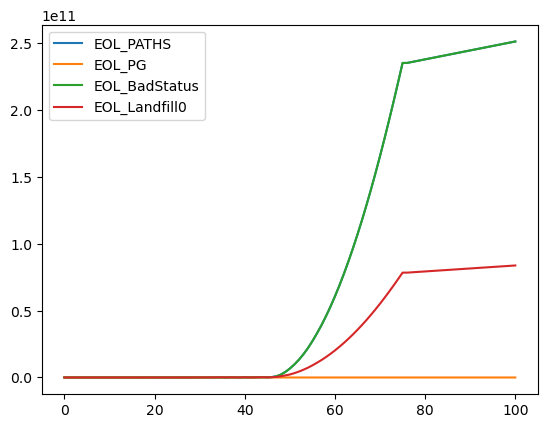

In [40]:
L0 = sim1.scenario['IRENA'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['IRENA'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['IRENA'].dataOut_m['EOL_PG']
PB = sim1.scenario['IRENA'].dataOut_m['EOL_BadStatus']
IRENA_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

plt.plot(IRENA_EOLpaths, label=IRENA_EOLpaths.columns)
plt.legend()

Text(0.5, 1.0, 'PVICE')

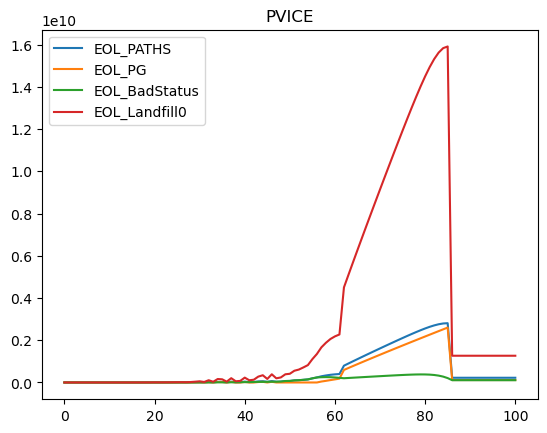

In [42]:
L0 = sim1.scenario['PV_ICE'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['PV_ICE'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['PV_ICE'].dataOut_m['EOL_PG']
PB = sim1.scenario['PV_ICE'].dataOut_m['EOL_BadStatus']
PVICE_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

plt.plot(PVICE_EOLpaths, label=PVICE_EOLpaths.columns)
plt.legend()
plt.title('PVICE')

# Remove Trim Years

In [21]:
sim2 = PV_ICE.Simulation(name='sim2', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [22]:
sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [23]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss_t2.csv')
sim2.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

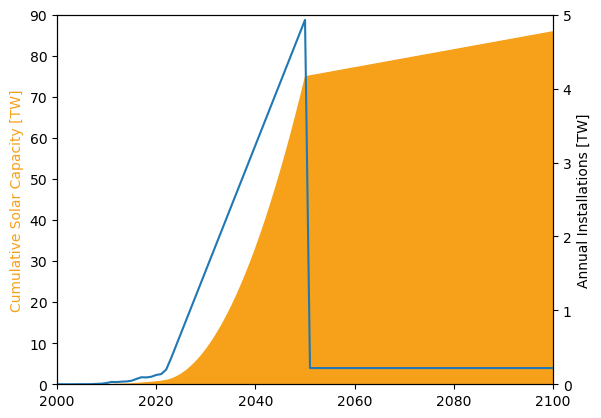

In [24]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [25]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection.loc[:2050,'World_annual_[MWdc]'], start_year=2000)

In [26]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [27]:
sim2.calculateMassFlow() #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  IRENA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


In [28]:
sim2.saveSimulation(customname='_debugirena2a')

:) Saved Input and Output Dataframes


In [29]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots

(0.0, 78.75006495310001)

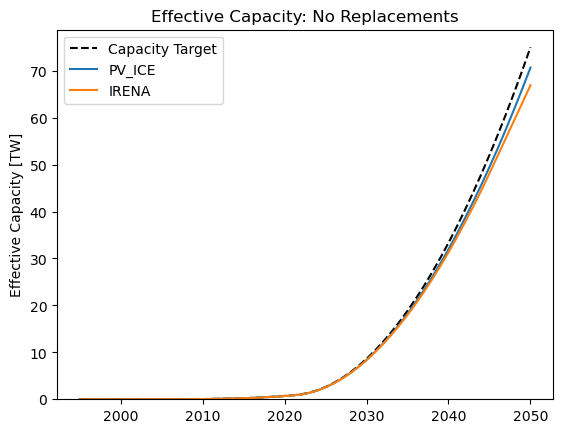

In [30]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')
plt.plot(ii_cumu2['newInstalledCapacity_sim2_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

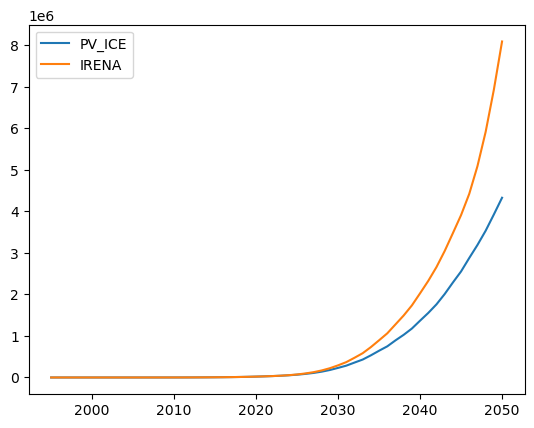

In [31]:
plt.plot(ii_yearly2.filter(like='Decommisioned'))
plt.legend(sim1.scenario.keys())

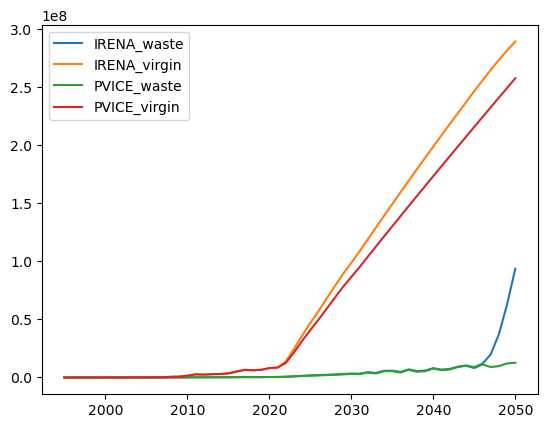

In [32]:
plt.plot(ii_yearly2['WasteAll_Module_sim2_IRENA_[Tonnes]'], label='IRENA_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')

#plt.plot(ii_yearly2['WasteAll_Module_sim2_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly2['VirginStock_Module_sim2_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')

plt.legend()

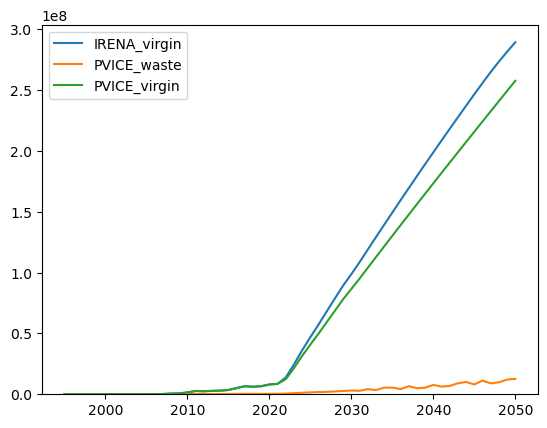

In [33]:
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

(0.0, 3316070901.7051816)

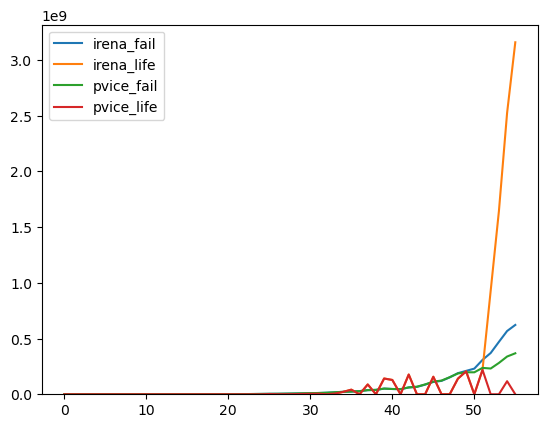

In [34]:
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='irena_fail')
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='irena_life')

#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='pvice_fail')
plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='pvice_life')
plt.legend()
plt.ylim(0,)